In [132]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
import matplotlib.pyplot as plt
import tensorflow as tf

plt.style.use('fivethirtyeight')

In [133]:
df = pd.read_csv('Data/GBIME.csv')
df

,Unnamed: 0,t,c,o,h,l,v
0,0,2012-09-09 14:59:59,46.052427,46.052427,46.052427,42.894547,50
1,1,2012-09-10 14:59:59,50.526092,46.052427,50.526092,46.841898,254
2,2,2012-09-11 14:59:59,55.526070,50.526092,55.526070,51.315562,376
3,3,2012-09-12 14:59:59,61.052361,55.526070,61.052361,56.578697,1131
4,4,2012-09-13 14:59:59,67.104966,61.052361,67.104966,62.104988,27430
...,...,...,...,...,...,...,...
1992,1992,2023-05-07 14:59:40,183.000000,187.000000,187.000000,183.000000,49157
1993,1993,2023-05-08 14:59:40,181.500000,186.000000,186.000000,180.200000,70629
1994,1994,2023-05-09 14:59:40,183.200000,184.900000,184.900000,180.400000,59202
1995,1995,2023-05-10 14:59:40,183.200000,185.000000,185.000000,182.200000,30993


In [134]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [135]:
df['t'] = pd.to_datetime(df['t']).dt.date

df

,t,c,o,h,l,v
0,2012-09-09,46.052427,46.052427,46.052427,42.894547,50
1,2012-09-10,50.526092,46.052427,50.526092,46.841898,254
2,2012-09-11,55.526070,50.526092,55.526070,51.315562,376
3,2012-09-12,61.052361,55.526070,61.052361,56.578697,1131
4,2012-09-13,67.104966,61.052361,67.104966,62.104988,27430
...,...,...,...,...,...,...
1992,2023-05-07,183.000000,187.000000,187.000000,183.000000,49157
1993,2023-05-08,181.500000,186.000000,186.000000,180.200000,70629
1994,2023-05-09,183.200000,184.900000,184.900000,180.400000,59202
1995,2023-05-10,183.200000,185.000000,185.000000,182.200000,30993


In [136]:
df.set_index(pd.to_datetime(df['t']), inplace=True)


In [137]:
df.drop('t',axis=1,inplace=True)
df

,c,o,h,l,v
t,,,,,
2012-09-09,46.052427,46.052427,46.052427,42.894547,50
2012-09-10,50.526092,46.052427,50.526092,46.841898,254
2012-09-11,55.526070,50.526092,55.526070,51.315562,376
2012-09-12,61.052361,55.526070,61.052361,56.578697,1131
2012-09-13,67.104966,61.052361,67.104966,62.104988,27430
...,...,...,...,...,...
2023-05-07,183.000000,187.000000,187.000000,183.000000,49157
2023-05-08,181.500000,186.000000,186.000000,180.200000,70629
2023-05-09,183.200000,184.900000,184.900000,180.400000,59202


In [138]:
df2 = df.copy()
df2 = df.filter(['c','o'])
df2

,c,o
t,,
2012-09-09,46.052427,46.052427
2012-09-10,50.526092,46.052427
2012-09-11,55.526070,50.526092
2012-09-12,61.052361,55.526070
2012-09-13,67.104966,61.052361
...,...,...
2023-05-07,183.000000,187.000000
2023-05-08,181.500000,186.000000
2023-05-09,183.200000,184.900000


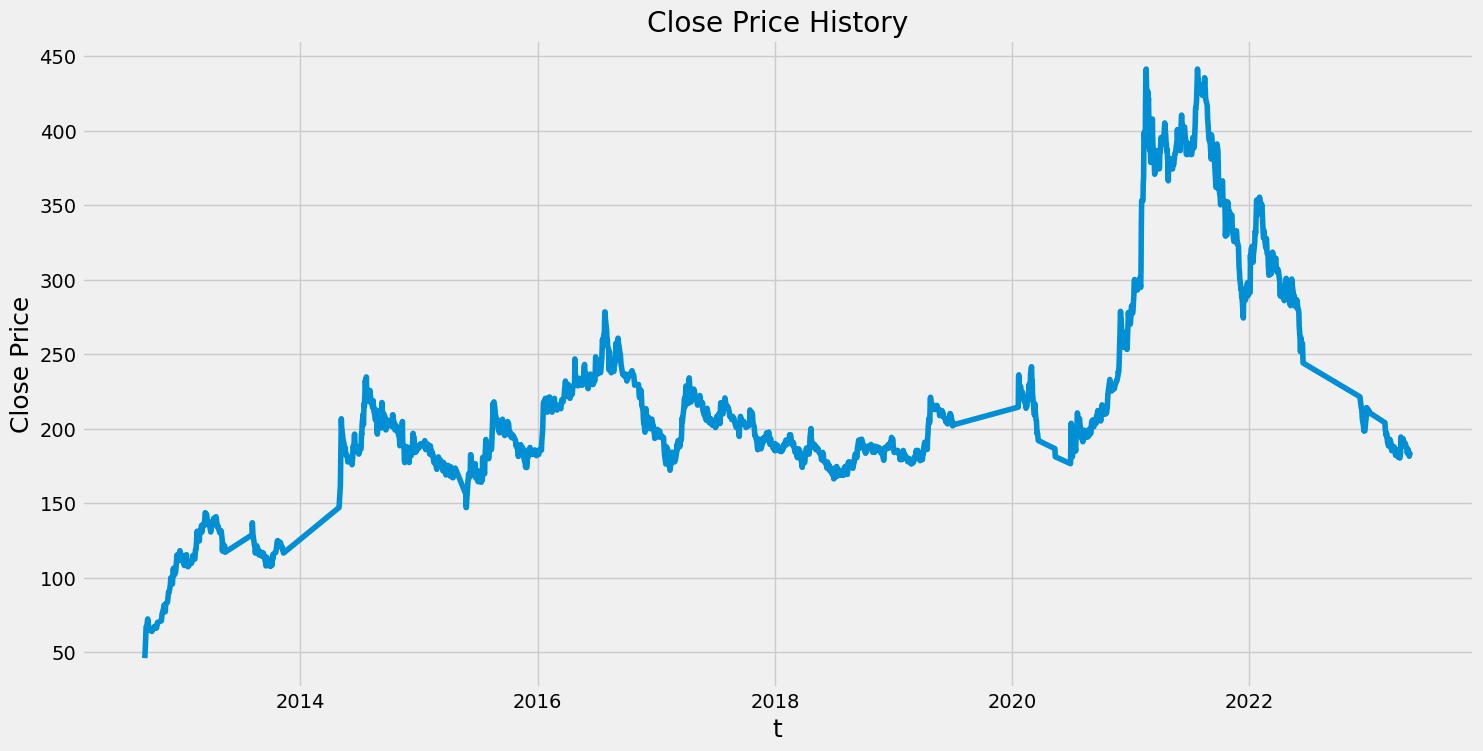

In [139]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['c'])
plt.xlabel('t',fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [140]:
ma100 = df.c.rolling(100).mean()
ma100

t
2012-09-09           NaN
2012-09-10           NaN
2012-09-11           NaN
2012-09-12           NaN
2012-09-13           NaN
                 ...    
2023-05-07    219.243437
2023-05-08    218.165233
2023-05-09    217.126359
2023-05-10    216.123408
2023-05-11    215.121165
Name: c, Length: 1997, dtype: float64

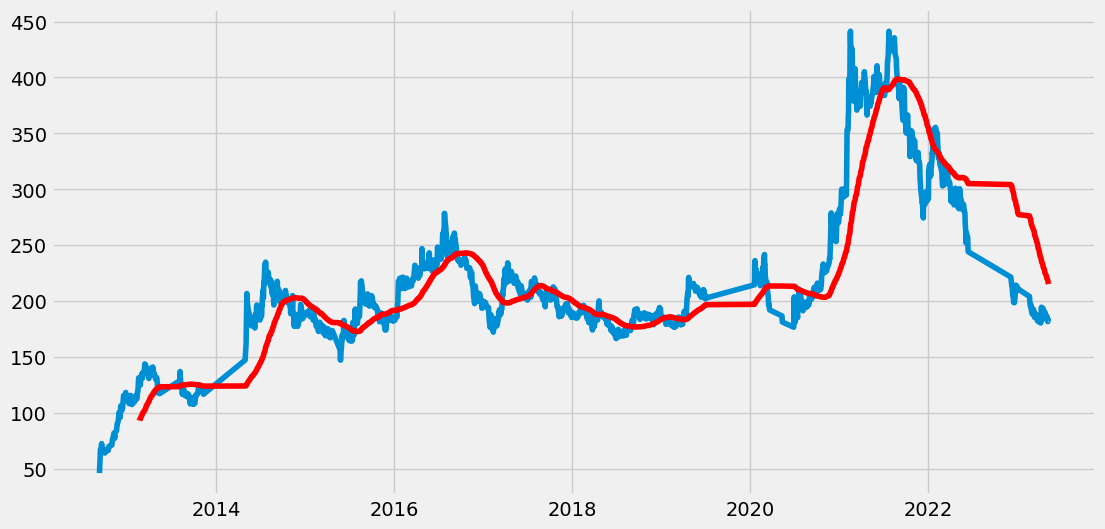

In [141]:
plt.figure(figsize=(12,6))
plt.plot(df.c)
plt.plot(ma100,'r')

In [142]:
ma200 = df.c.rolling(200).mean()
ma200

t
2012-09-09           NaN
2012-09-10           NaN
2012-09-11           NaN
2012-09-12           NaN
2012-09-13           NaN
                 ...    
2023-05-07    265.163466
2023-05-08    264.498636
2023-05-09    263.878228
2023-05-10    263.264617
2023-05-11    262.671262
Name: c, Length: 1997, dtype: float64

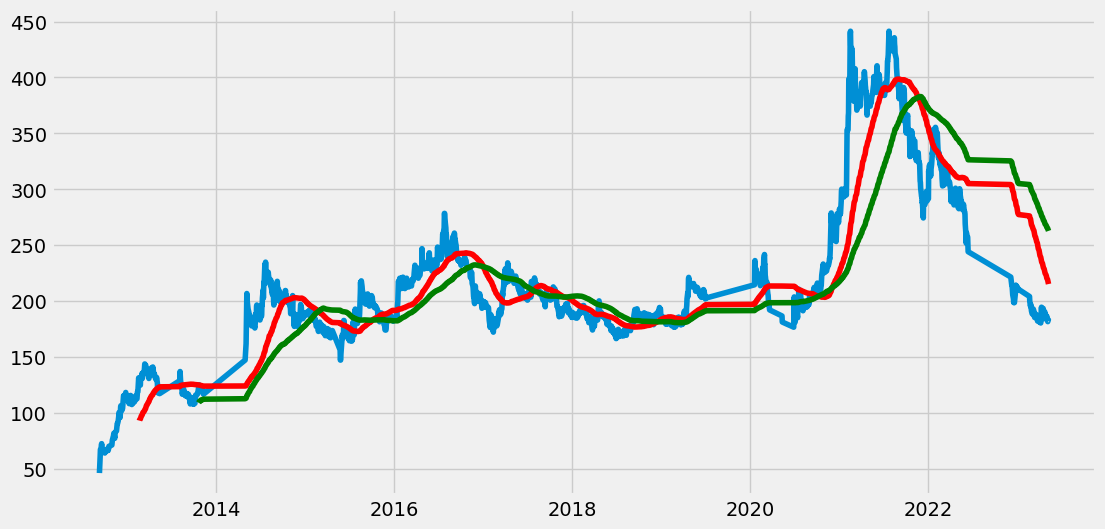

In [143]:
plt.figure(figsize=(12,6))
plt.plot(df.c)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [144]:
#dataframe with only close price
data = df.filter(['c'])

#convert the df to a numpy array
dataset = data.values
dataset

# get the number of rows to train the model on

training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1598

In [145]:
dataset.shape

(1997, 1)

In [146]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.01131846],
       [0.0239685 ],
       ...,
       [0.34698606],
       [0.34698606],
       [0.34470904]])

In [147]:
tf.random.set_seed(42)

In [148]:
#training the dataset
train_data = scaled_data[0:training_data_len,:]

#split the data into x_train and y_train 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

    if i<=61:
        print(x_train)
        print(y_train)
        print()


[array([0.        , 0.01131846, 0.0239685 , 0.03795013, 0.05326334,
       0.0565923 , 0.06325021, 0.06657917, 0.06325021, 0.0565923 ,
       0.047937  , 0.04860279, 0.04860279, 0.047937  , 0.04660542,
       0.04593963, 0.04527384, 0.04860279, 0.04860279, 0.04993438,
       0.05126596, 0.05126596, 0.05392913, 0.05193175, 0.05060017,
       0.05259754, 0.05126596, 0.0565923 , 0.06058705, 0.06325021,
       0.06857655, 0.07456867, 0.0805608 , 0.08122659, 0.08588713,
       0.08988188, 0.0885503 , 0.07856342, 0.09187926, 0.09520821,
       0.10519509, 0.11185301, 0.11118721, 0.11784513, 0.12250567,
       0.12716622, 0.1364873 , 0.1364873 , 0.12982938, 0.12583463,
       0.1364873 , 0.14980313, 0.1524663 , 0.14114784, 0.14247943,
       0.14314522, 0.14647418, 0.16911109, 0.17510322, 0.17377164])]
[0.17510321873408657]

[array([0.        , 0.01131846, 0.0239685 , 0.03795013, 0.05326334,
       0.0565923 , 0.06325021, 0.06657917, 0.06325021, 0.0565923 ,
       0.047937  , 0.04860279, 0.04

In [149]:
#convert the x train and y train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [150]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1538, 60, 1)

In [151]:
#build the lstm model

model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [152]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_16 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_17 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_17 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_18 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_18 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_19 (LSTM)              (None, 120)              

In [153]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [154]:
#train the model
model.fit(x_train, y_train, batch_size=10,epochs=10)

Epoch 1/10
154/154 [==============================] - 39s 191ms/step - loss: 0.0089
Epoch 2/10
154/154 [==============================] - 24s 154ms/step - loss: 0.0041
Epoch 3/10
154/154 [==============================] - 25s 161ms/step - loss: 0.0031
Epoch 4/10
154/154 [==============================] - 21s 137ms/step - loss: 0.0025
Epoch 5/10
154/154 [==============================] - 20s 132ms/step - loss: 0.0023
Epoch 6/10
154/154 [==============================] - 16s 106ms/step - loss: 0.0021
Epoch 7/10
154/154 [==============================] - 24s 153ms/step - loss: 0.0018
Epoch 8/10
154/154 [==============================] - 16s 105ms/step - loss: 0.0018
Epoch 9/10
154/154 [==============================] - 18s 117ms/step - loss: 0.0017
Epoch 10/10
154/154 [==============================] - 20s 128ms/step - loss: 0.0018


In [155]:
#create the testing dataset
test_data = scaled_data [training_data_len-60:,:]

#create dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [156]:
#convert data to a numpy array
x_test = np.array(x_test)


In [157]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [158]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

13/13 [==============================] - 2s 53ms/step


array([[290.41785],
       [292.5034 ],
       [295.77942],
       [300.1375 ],
       [305.44025],
       [311.45367],
       [318.23483],
       [325.7379 ],
       [333.6035 ],
       [341.85495],
       [350.68085],
       [360.0618 ],
       [369.57632],
       [378.6233 ],
       [386.8601 ],
       [393.98935],
       [399.94684],
       [404.61603],
       [407.71527],
       [409.33368],
       [409.59372],
       [408.63034],
       [406.8613 ],
       [404.87656],
       [402.918  ],
       [401.044  ],
       [399.11935],
       [396.97266],
       [394.55573],
       [392.00418],
       [389.52756],
       [387.3357 ],
       [385.47876],
       [383.91733],
       [382.6092 ],
       [381.49063],
       [380.468  ],
       [379.49475],
       [378.71124],
       [378.20197],
       [378.12405],
       [378.4685 ],
       [379.15695],
       [380.08032],
       [381.12903],
       [382.20975],
       [383.3383 ],
       [384.62912],
       [386.0174 ],
       [387.35443],


In [159]:
#get the root mean squared erro(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.1553838644490957

C:\Users\bisha\AppData\Local\Temp\ipykernel_4496\3811046830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


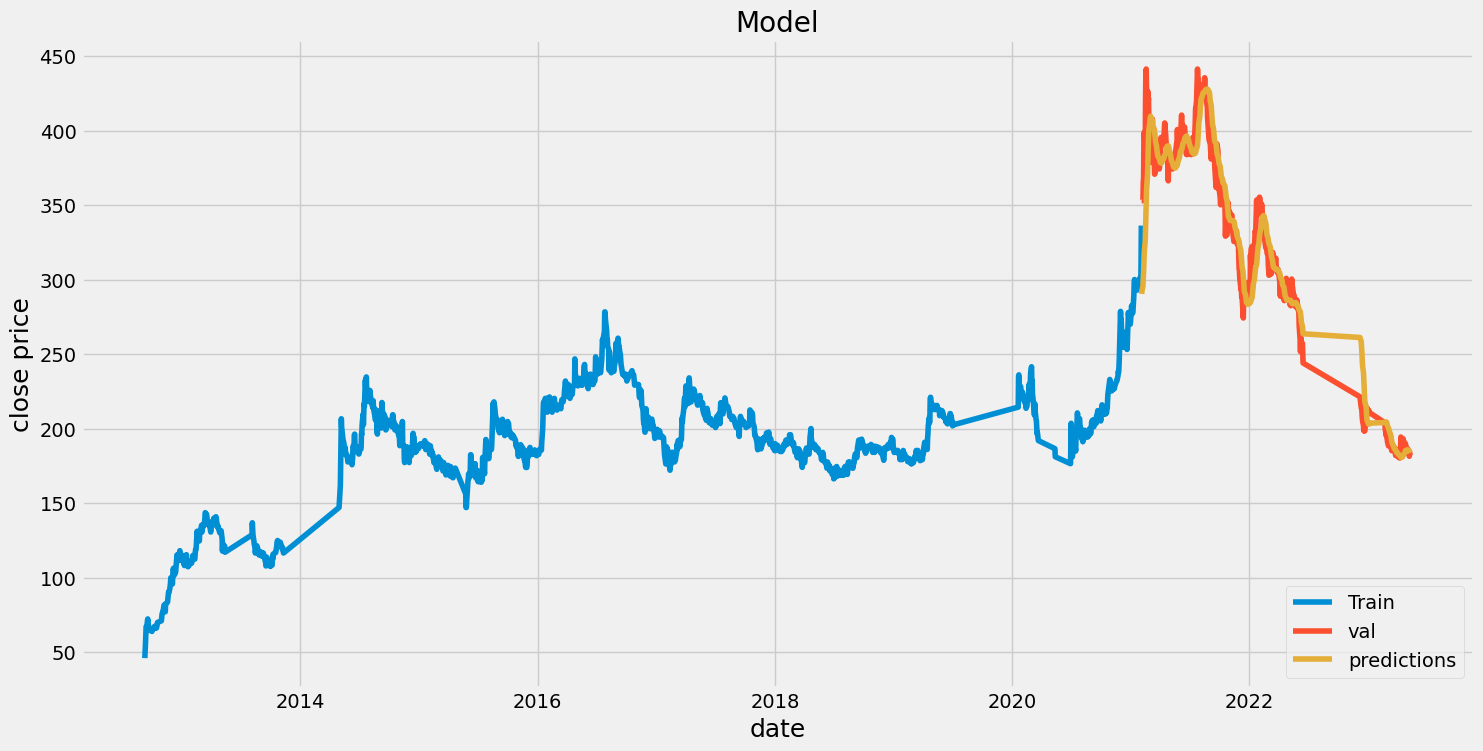

In [160]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

#visualise
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['c'])
plt.plot(valid[['c','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

In [161]:
valid['predictions'] = predictions
predictions = np.array(predictions).flatten()
predictions

C:\Users\bisha\AppData\Local\Temp\ipykernel_4496\111186762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


array([290.41785, 292.5034 , 295.77942, 300.1375 , 305.44025, 311.45367,
       318.23483, 325.7379 , 333.6035 , 341.85495, 350.68085, 360.0618 ,
       369.57632, 378.6233 , 386.8601 , 393.98935, 399.94684, 404.61603,
       407.71527, 409.33368, 409.59372, 408.63034, 406.8613 , 404.87656,
       402.918  , 401.044  , 399.11935, 396.97266, 394.55573, 392.00418,
       389.52756, 387.3357 , 385.47876, 383.91733, 382.6092 , 381.49063,
       380.468  , 379.49475, 378.71124, 378.20197, 378.12405, 378.4685 ,
       379.15695, 380.08032, 381.12903, 382.20975, 383.3383 , 384.62912,
       386.0174 , 387.35443, 388.5031 , 389.33142, 389.80148, 389.8109 ,
       389.19818, 388.0981 , 386.65793, 385.04163, 383.4476 , 381.97852,
       380.66443, 379.4981 , 378.45407, 377.50146, 376.67035, 375.99518,
       375.46548, 375.07178, 374.8813 , 374.93448, 375.2256 , 375.7374 ,
       376.44897, 377.3879 , 378.63605, 380.12372, 381.6824 , 383.2176 ,
       384.60132, 385.70953, 386.48795, 387.08777, 

In [162]:
valid

,c,predictions
t,,
2021-02-03,353.045013,290.417847
2021-02-04,353.045013,292.503387
2021-02-07,353.045013,295.779419
2021-02-08,365.401589,300.137512
2021-02-09,368.049426,305.440247
...,...,...
2023-05-07,183.000000,185.470123
2023-05-08,181.500000,185.136108
2023-05-09,183.200000,184.711533


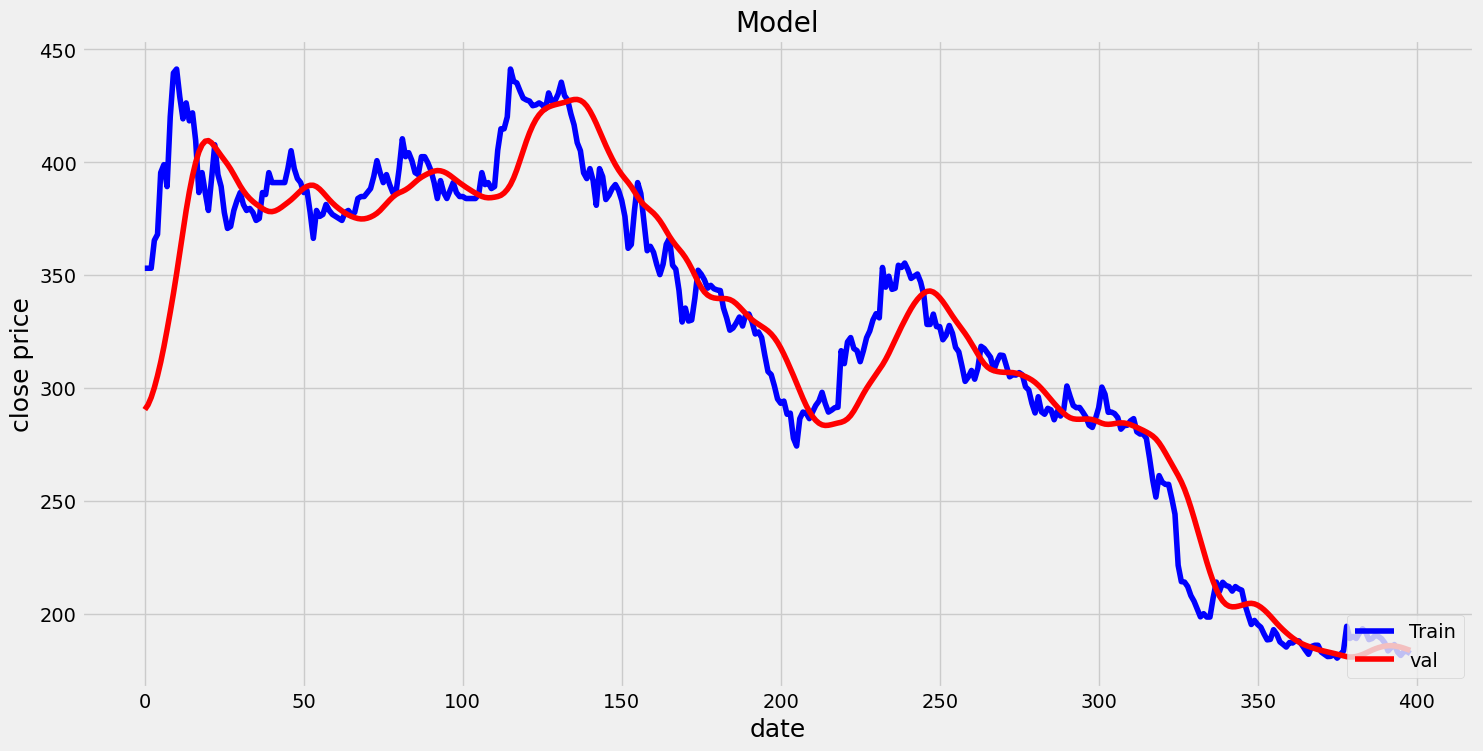

In [163]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(y_test,'b', label='Original Price')
plt.plot(predictions,'r', label='Predicted Price')
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

In [164]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(valid['c'],valid['predictions']), tf.float32))
print("Accuracy:", accuracy.numpy())

Accuracy: 0.0


In [165]:
#model.save('keras_model.h5')